# Assignment 3 Question 7


## Loading library and dataset


In [1]:
library(ISLR2)
library(randomForest)
library(tree)

attach(Carseats)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [2]:
MSE <- (\(predict, test) signif(mean((predict - test)**2), digits = 5))


## Set random seed


In [3]:
seed <- 1
print(seed)


[1] 1


## Part A


In [4]:
set.seed(seed)


In [5]:
rand <- sample(nrow(Carseats), nrow(Carseats) / 2)
Carseats.train <- Carseats[rand, ]
Carseats.test <- Carseats[-rand, ]


## Part B


In [6]:
Carseats.tree <- tree(Sales ~ ., data = Carseats.train)
summary(Carseats.tree)




Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

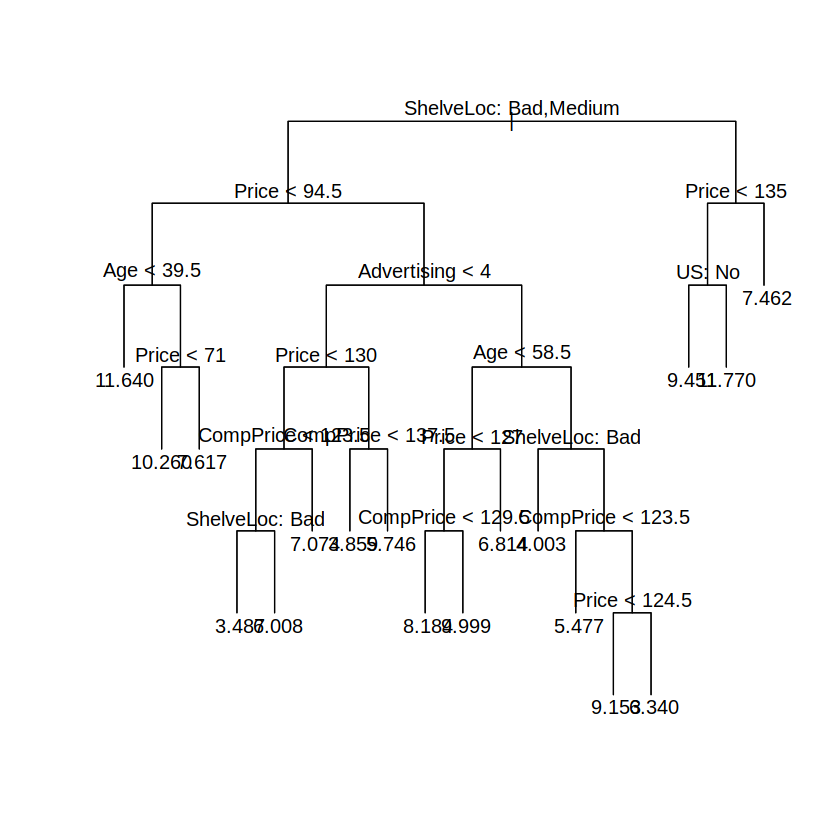

In [7]:
plot(Carseats.tree, type = "uniform")
text(Carseats.tree, pretty = 0)


In [8]:
Carseats.test.pred <- predict(Carseats.tree, Carseats.test)
MSE(Carseats.test$Sales, Carseats.test.pred)


[1] 4.922

## Part C


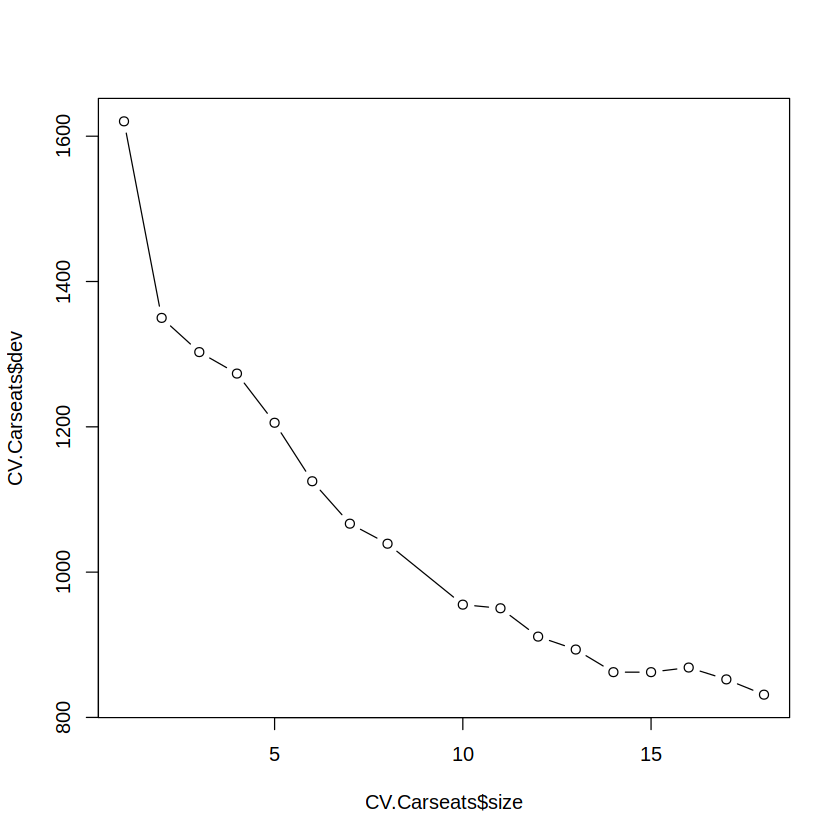

In [9]:
CV.Carseats <- cv.tree(Carseats.tree, FUN = prune.tree)
plot(CV.Carseats$size, CV.Carseats$dev, type = "b")


In [10]:
prune.Carseats <- prune.tree(Carseats.tree, best = 10)
summary(prune.Carseats)



Regression tree:
snip.tree(tree = Carseats.tree, nodes = c(21L, 44L, 40L, 9L, 
6L, 23L))
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
Number of terminal nodes:  10 
Residual mean deviance:  3.18 = 604.3 / 190 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.6590 -1.1310  0.1177  0.0000  1.0040  4.4780 

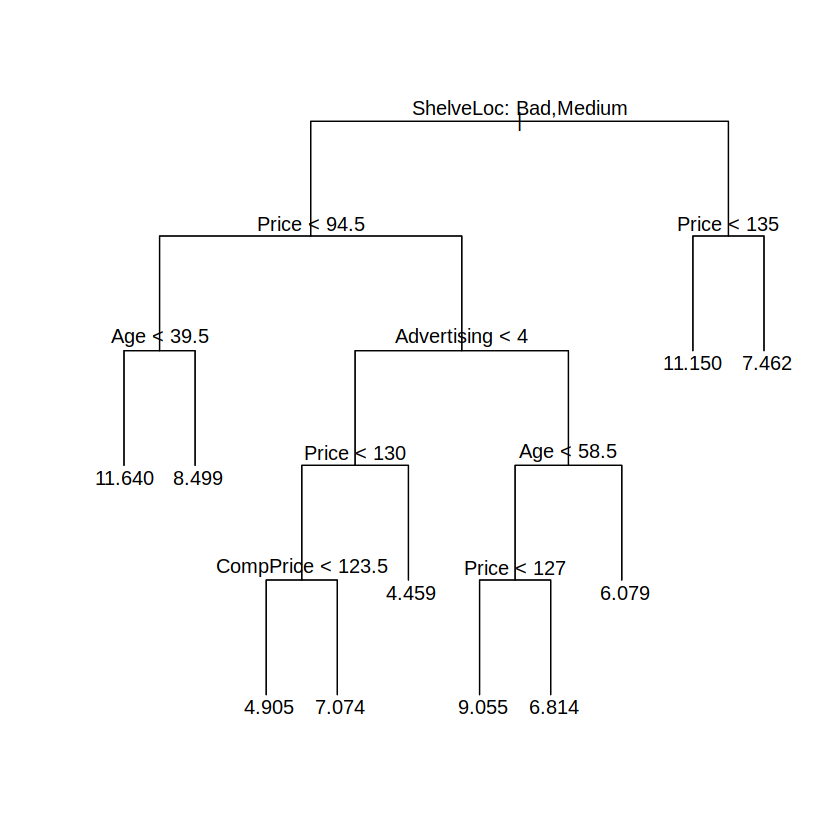

In [11]:
plot(prune.Carseats, type = "uniform")
text(prune.Carseats, pretty = 0)


In [12]:
Carseats.test.prune <- predict(prune.Carseats, Carseats.test)
MSE(Carseats.test$Sales, Carseats.test.prune)


[1] 4.9181

## Part D


In [13]:
set.seed(seed)


In [14]:
pNum <- length(Carseats) - 1
bag.Carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = pNum, ntree = 1000, importance = TRUE)
bag.Carseats.pred <- predict(bag.Carseats, Carseats.test)
bag.MSE <- MSE(Carseats.test$Sales, bag.Carseats.pred)
bag.MSE


[1] 2.5948

In [15]:
importance(bag.Carseats)


,%IncMSE,IncNodePurity
CompPrice,35.9272134,168.30209
Income,7.1843537,90.05510
Advertising,18.5721057,100.07923
Population,-2.1149761,57.80507
Price,79.7876185,502.44807
ShelveLoc,65.0093453,381.01569
Age,26.3383966,156.74400
Education,2.0498271,45.65096
Urban,0.8200392,9.57144
US,6.7834474,18.09065


## Part E


In [16]:
set.seed(seed)


In [17]:
pNum <- sqrt(pNum)
rf.Carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = pNum, ntree = 1000, importance = TRUE)
rf.Carseats.pred <- predict(rf.Carseats, Carseats.test)
rf.MSE <- MSE(Carseats.test$Sales, rf.Carseats.pred)
rf.MSE


[1] 2.9892

In [18]:
importance(rf.Carseats)


,%IncMSE,IncNodePurity
CompPrice,21.4135426,158.16479
Income,5.0007222,127.87672
Advertising,12.3858357,109.18704
Population,-2.3602509,99.77771
Price,51.1660936,389.03342
ShelveLoc,50.4332175,291.84005
Age,18.1175572,177.28269
Education,0.6815885,71.19268
Urban,-1.9568334,16.27786
US,8.0680759,33.67115


In [19]:
bag.MSE
rf.MSE


[1] 2.5948

[1] 2.9892